In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_excel("C:/Users/thira/Downloads/Grade_CS_Students (1).xlsx",na_values=['NA'])
df=df.drop(['Year of enrolment', 'ID'], axis=1)
#replace all the missing values with the mean of the column
#df_cleaned=df.fillna(df.mean(),axis=1, inplace=True)
columns=df.columns
df.fillna(0, inplace=True)
# for col in columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')
#     df.fillna({col: df[col].mean()}, inplace=True)
  
# df.fillna({'MA112':df['MA112'].mean()}, inplace=True)
# Convert scores into grades

def encode_grade(marks):
    if marks > 85:
        return 1  #'A+'
    elif 80 <= marks <= 85:
        return 2  #'A'
    elif 75 <= marks < 80:
        return 3  #'A-'
    elif 70 <= marks < 75:
        return 4  #'B+'
    elif 65 <= marks < 70:
        return 5  #'B'
    elif 60 <= marks < 65:
        return 6  #'B-'
    elif 55 <= marks < 60:
        return 7  #'C+'
    elif 50 <= marks < 55:
        return 8  #'C'
    elif 45 <= marks < 50:
        return 9  #'C-'
    elif 40 <= marks < 45:
        return 10 #'D+'
    elif 35 <= marks < 40:
        return 11 #'D'
    else:
        return 0 #'E'

df = df.map(encode_grade)
df.head()

,CS101,CS102,MA101,MA112,MA121,GS101,GS102,PH101,PH102,PH103,...,CS507,CS508,CS509,CS510,CS512,CS597,CS598,MA419,SW499,MM507
0,10,8,10,0,10,10,7,10,10,0,...,8,10,5,9,10,6,4,7,6,0
1,10,10,9,0,10,9,9,10,8,10,...,10,10,9,10,10,6,4,5,4,0
2,8,3,9,0,10,9,8,10,9,10,...,8,10,5,10,10,6,3,6,5,0
3,10,10,10,0,10,10,10,10,10,9,...,10,7,7,10,10,5,6,9,5,0
4,8,8,8,0,10,5,8,10,10,10,...,8,10,10,6,10,6,4,8,5,0


In [4]:
correlation_matrix = df.corr()

# Print the correlation matrix
#print(correlation_matrix)
# Create a heatmap
first_column = df.columns[0]
correlations_with_first_column = correlation_matrix[first_column].drop(first_column)
# Sort the correlations in descending order and select the top 10
top_10_correlations = correlations_with_first_column.sort_values(ascending=False).head(10)

# Print the top 10 correlated columns
print(top_10_correlations)

# # Step 5: Plot the bar chart
# plt.figure(figsize=(10, 6))
# sns.barplot(x=correlations_with_first_column.index, y=correlations_with_first_column.values)
# plt.title(f'Correlation of All Other Columns with {first_column}')
# plt.xlabel('Columns')
# plt.ylabel('Correlation')
# plt.xticks(rotation=45)
# plt.show()

ST112    0.425057
ST111    0.393635
CS312    0.383178
CS308    0.362730
SW499    0.357489
OR201    0.350810
MA101    0.347250
CS202    0.335568
CS204    0.335482
CS306    0.332218
Name: CS101, dtype: float64


In [10]:
for column in df.columns:
    correlations_with_column = correlation_matrix[column].drop(column)
    top_10_correlations = correlations_with_column.sort_values(ascending=False).head(10)
    print(f'\nTop 10 correlations with {column}:')
    print(top_10_correlations)


Top 10 correlations with CS101:
ST112    0.425057
ST111    0.393635
CS312    0.383178
CS308    0.362730
SW499    0.357489
OR201    0.350810
MA101    0.347250
CS202    0.335568
CS204    0.335482
CS306    0.332218
Name: CS101, dtype: float64

Top 10 correlations with CS102:
OR201    0.414759
CS301    0.385021
ST112    0.379275
CS504    0.333544
ST204    0.305966
ST111    0.286724
OR202    0.282539
CS101    0.279524
ST121    0.273393
CS509    0.269323
Name: CS102, dtype: float64

Top 10 correlations with MA101:
MA211    0.624922
ST111    0.546904
ST112    0.515604
MA201    0.483922
CS312    0.481412
MA212    0.461064
OR201    0.454254
PH101    0.451825
CS308    0.450542
ST211    0.449019
Name: MA101, dtype: float64

Top 10 correlations with MA112:
MM507    0.566919
CS302    0.340608
CS307    0.257870
CS504    0.217646
ST203    0.211460
ST122    0.173966
CS301    0.160432
GS202    0.145710
GS102    0.144432
CS202    0.143540
Name: MA112, dtype: float64

Top 10 correlations with MA121:
ST2

Training Accuracy: 1.00
Testing Accuracy: 0.44


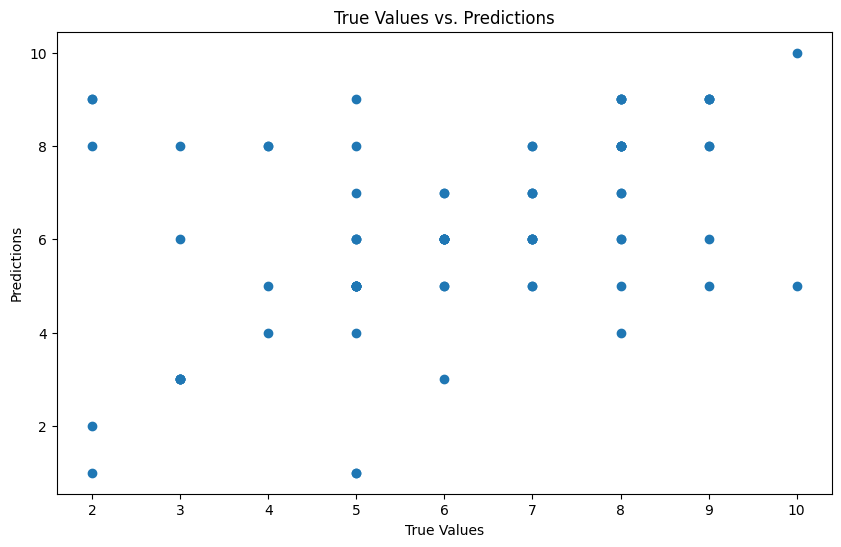

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



# Feature selection (previous year subjects) and target variable (fifth-year subjects)
features = df.drop(['CS501','CS502','CS503','CS504','CS505','CS506','CS507','CS508','CS509','CS510','CS512','CS597','CS598','MM507'], axis=1)
target = df['CS502']

#features.head()
# target.head()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create and train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(70,100), max_iter=500)
mlp.fit(X_train_scaled, y_train)

# Evaluate model
train_accuracy = accuracy_score(y_train, mlp.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

#plotthe Y-test and Y-predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, mlp.predict(X_test_scaled))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()



In [24]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [
        (50,), 
        (100,), 
        (100, 50), 
        (100, 50, 25),
        (200, 100, 50),
        (50, 25)
    ],
    'max_iter': [200, 500],
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'learning_rate_init': [0.0001,0.001, 0.01,0.1]  # Initial learning rate
}

# Create the MLP model
mlp = MLPClassifier(random_state=0)

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.2f}')

# Evaluate the best model on the test set
best_mlp = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_mlp.predict(X_test_scaled))
print(f'Test accuracy: {test_accuracy:.2f}')

c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best cross-validation accuracy: 0.37
Test accuracy: 0.42


In [14]:
#for all final year subjects


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def optimize_mlp_for_target(df, target_column, drop_columns):
    # Feature selection (drop the target column from features)
    features = df.drop(drop_columns, axis=1)
    target = df[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid
    param_grid = {
        'hidden_layer_sizes': [
            (50,),
            (96, 48, 24), 
            (100,), 
            (100, 50), 
            (100, 50, 25),
            (200, 100, 50),
            (50, 25)
        ],
        'max_iter': [500],
        'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
        'learning_rate_init': [0.0001, 0.001],  # Initial learning rate
        'early_stopping': [True],  # Enable early stopping
        'n_iter_no_change': [50],  # Number of iterations with no improvement to wait before stopping
    }

    # Create the MLP model
    mlp = MLPClassifier(random_state=0)

    # Use GridSearchCV to search for the best parameters
    grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Print the best parameters and best score
    print(f'Best parameters found for {target_column}: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy for {target_column}: {grid_search.best_score_:.2f}')

    # Evaluate the best model on the test set
    best_mlp = grid_search.best_estimator_
    y_pred = best_mlp.predict(X_test_scaled)
    y_train_pred = best_mlp.predict(X_train_scaled)

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    test_recall = recall_score(y_test, y_pred, average='macro')
    test_f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Test accuracy for {target_column}: {test_accuracy:.2f}')
    print(f'Train accuracy for {target_column}: {train_accuracy:.2f}')
    print(f'Test precision for {target_column}: {test_precision:.2f}')
    print(f'Test recall for {target_column}: {test_recall:.2f}')
    print(f'Test F1 score for {target_column}: {test_f1:.2f}')

    return test_accuracy, train_accuracy,test_precision, test_recall, test_f1




# Convert scores into grades

def encode_grade(marks):
    if marks > 85:
        return 1  #'A+'
    elif 80 <= marks <= 85:
        return 2  #'A'
    elif 75 <= marks < 80:
        return 3  #'A-'
    elif 70 <= marks < 75:
        return 4  #'B+'
    elif 65 <= marks < 70:
        return 5  #'B'
    elif 60 <= marks < 65:
        return 6  #'B-'
    elif 55 <= marks < 60:
        return 7  #'C+'
    elif 50 <= marks < 55:
        return 8  #'C'
    elif 45 <= marks < 50:
        return 9  #'C-'
    elif 40 <= marks < 45:
        return 10 #'D+'
    elif 35 <= marks < 40:
        return 11 #'D'
    else:
        return 0 #'E'
    

df=pd.read_excel("C:/Users/thira/Downloads/Grade_CS_Students (1).xlsx",na_values=['NA'])
df=df.drop(['Year of enrolment', 'ID'], axis=1)
fifth_year_subjects = ['CS501', 'CS502', 'CS503', 'CS504', 'CS505', 'CS506', 'CS507', 'CS508', 'CS509', 'CS510', 'CS512', 'CS597', 'CS598', 'MM507']

#dropping MA112 beacuse of more elements are NaN. Need to find a better way to handle missing values
#df=df.drop(['MA112', 'MM507'], axis=1)
columns=df.columns
#fill remaining NaNs with 0
# df.fillna(, inplace=True)
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df.fillna({col: df[col].median()}, inplace=True)
#converting marks into descrete values
df = df.map(encode_grade)
# df.head()


metrics = {}
# for subject in fifth_year_subjects:
    
#     accuracies[subject] = optimize_mlp_for_target(df, subject,drop_columns=fifth_year_subjects)

# # Print all accuracies
# for subject, accuracy in accuracies.items():
#     print(f'{subject}: {accuracy:.2f}')

for subject in fifth_year_subjects:
    print(f"\nOptimizing for {subject}...")
    metrics[subject] = optimize_mlp_for_target(df, subject, drop_columns=fifth_year_subjects)

# Print all metrics
for subject, values in metrics.items():
    print(f'{subject}: Train Accuracy: {values[1]:.2f},Test Accuracy: {values[0]:.2f}, Precision: {values[2]:.2f}, Recall: {values[3]:.2f}, F1 Score: {values[4]:.2f}')


Optimizing for CS501...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS501: {'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS501: 0.38
Test accuracy for CS501: 0.43
Train accuracy for CS501: 0.96
Test precision for CS501: 0.55
Test recall for CS501: 0.39
Test F1 score for CS501: 0.38

Optimizing for CS502...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS502: {'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS502: 0.35
Test accuracy for CS502: 0.46
Train accuracy for CS502: 0.94
Test precision for CS502: 0.46
Test recall for CS502: 0.40
Test F1 score for CS502: 0.39

Optimizing for CS503...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS503: {'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS503: 0.47
Test accuracy for CS503: 0.42
Train accuracy for CS503: 0.85
Test precision for CS503: 0.41
Test recall for CS503: 0.26
Test F1 score for CS503: 0.26

Optimizing for CS504...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS504: {'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS504: 0.39
Test accuracy for CS504: 0.48
Train accuracy for CS504: 0.89
Test precision for CS504: 0.60
Test recall for CS504: 0.30
Test F1 score for CS504: 0.28

Optimizing for CS505...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS505: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (96, 48, 24), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS505: 0.38
Test accuracy for CS505: 0.33
Train accuracy for CS505: 0.91
Test precision for CS505: 0.35
Test recall for CS505: 0.27
Test F1 score for CS505: 0.25

Optimizing for CS506...
Best parameters found for CS506: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS506: 0.33
Test accuracy for CS506: 0.36
Train accuracy for CS506: 0.77
Test precision for CS506: 0.51
Test recall for CS506: 0.39
Test F1 score for CS506: 0.41

Optimizing for CS507...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS507: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (96, 48, 24), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS507: 0.37
Test accuracy for CS507: 0.40
Train accuracy for CS507: 0.49
Test precision for CS507: 0.56
Test recall for CS507: 0.28
Test F1 score for CS507: 0.23

Optimizing for CS508...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS508: {'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS508: 0.39
Test accuracy for CS508: 0.40
Train accuracy for CS508: 0.80
Test precision for CS508: 0.51
Test recall for CS508: 0.28
Test F1 score for CS508: 0.30

Optimizing for CS509...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS509: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS509: 0.37
Test accuracy for CS509: 0.38
Train accuracy for CS509: 0.88
Test precision for CS509: 0.34
Test recall for CS509: 0.36
Test F1 score for CS509: 0.33

Optimizing for CS510...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS510: {'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS510: 0.39
Test accuracy for CS510: 0.36
Train accuracy for CS510: 0.86
Test precision for CS510: 0.38
Test recall for CS510: 0.30
Test F1 score for CS510: 0.27

Optimizing for CS512...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS512: {'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS512: 0.40
Test accuracy for CS512: 0.39
Train accuracy for CS512: 0.80
Test precision for CS512: 0.51
Test recall for CS512: 0.30
Test F1 score for CS512: 0.29

Optimizing for CS597...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS597: {'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (96, 48, 24), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS597: 0.52
Test accuracy for CS597: 0.49
Train accuracy for CS597: 0.91
Test precision for CS597: 0.53
Test recall for CS597: 0.43
Test F1 score for CS597: 0.44

Optimizing for CS598...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for CS598: {'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for CS598: 0.52
Test accuracy for CS598: 0.57
Train accuracy for CS598: 0.95
Test precision for CS598: 0.66
Test recall for CS598: 0.34
Test F1 score for CS598: 0.33

Optimizing for MM507...


c:\Users\thira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found for MM507: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'max_iter': 500, 'n_iter_no_change': 50}
Best cross-validation accuracy for MM507: 0.57
Test accuracy for MM507: 0.64
Train accuracy for MM507: 0.94
Test precision for MM507: 0.55
Test recall for MM507: 0.53
Test F1 score for MM507: 0.54
CS501: Train Accuracy: 0.96,Test Accuracy: 0.43, Precision: 0.55, Recall: 0.39, F1 Score: 0.38
CS502: Train Accuracy: 0.94,Test Accuracy: 0.46, Precision: 0.46, Recall: 0.40, F1 Score: 0.39
CS503: Train Accuracy: 0.85,Test Accuracy: 0.42, Precision: 0.41, Recall: 0.26, F1 Score: 0.26
CS504: Train Accuracy: 0.89,Test Accuracy: 0.48, Precision: 0.60, Recall: 0.30, F1 Score: 0.28
CS505: Train Accuracy: 0.91,Test Accuracy: 0.33, Precision: 0.35, Recall: 0.27, F1 Score: 0.25
CS506: Train Accuracy: 0.77,Test Accuracy: 0.36, Precision: 0.51, Recall: 0.39, F1 Score: 0.41
CS507: Train Accuracy: 0.49,Test Accuracy: 0.40, Pr

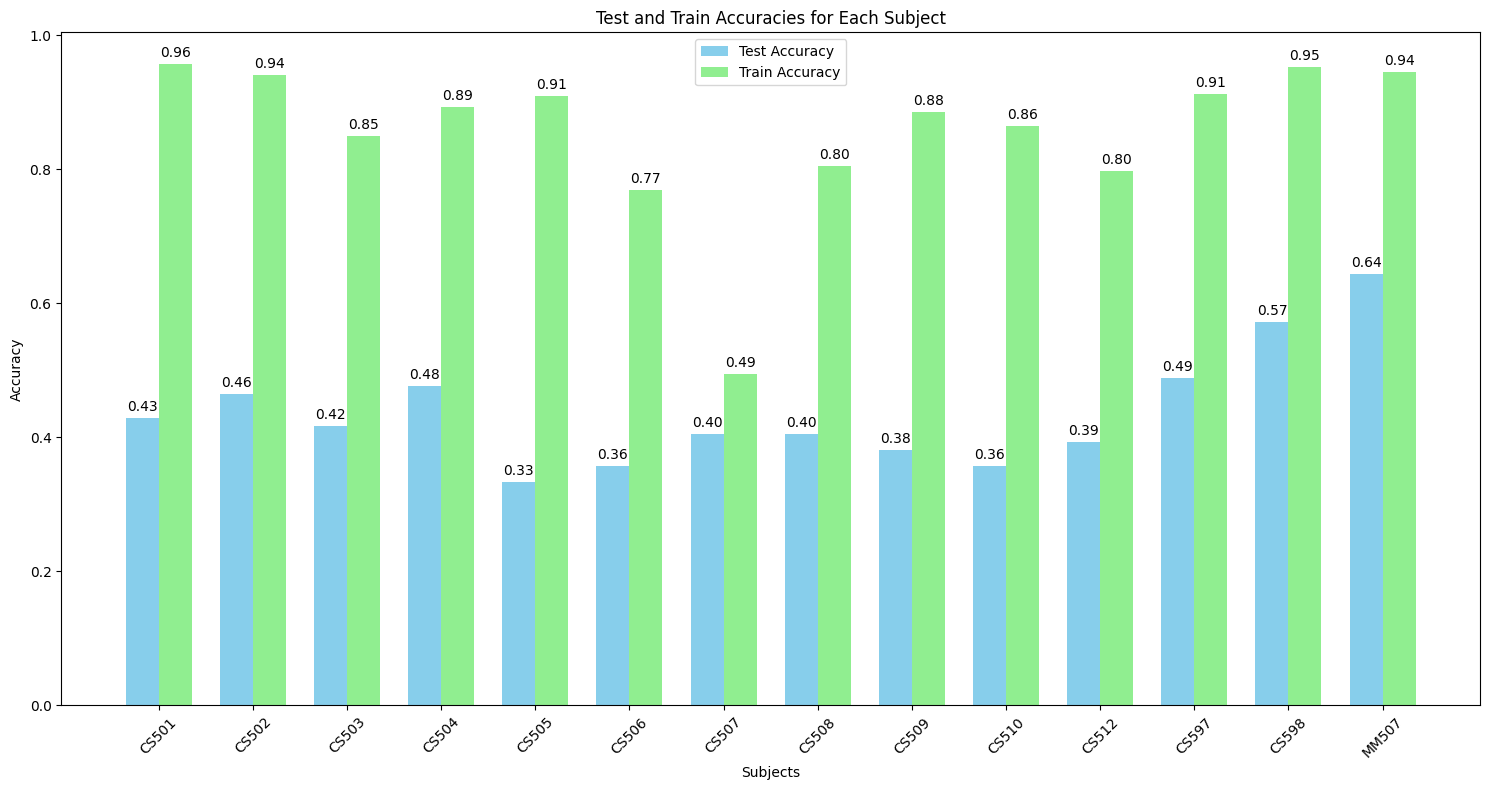

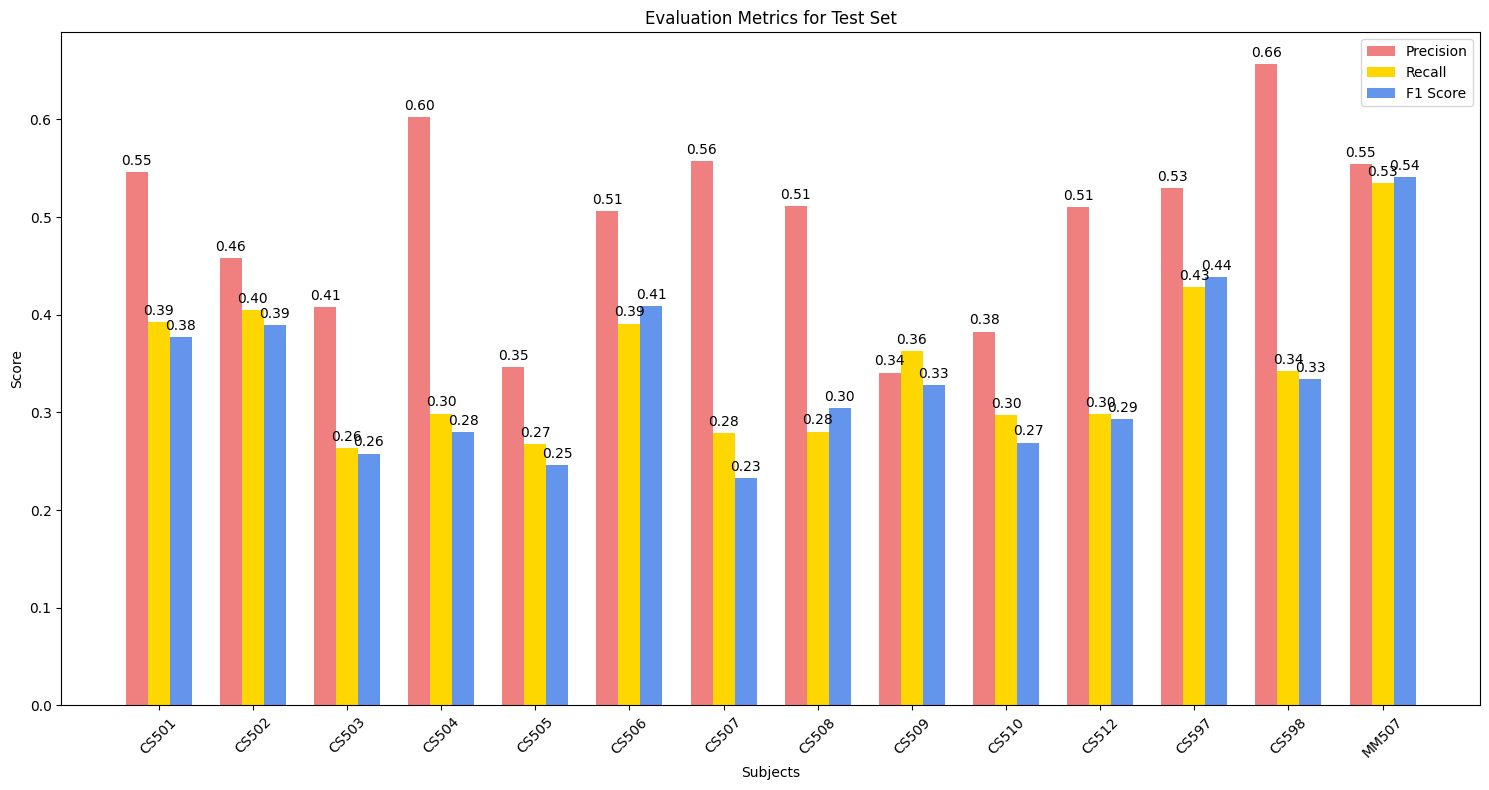

In [15]:
# # Extract subjects and their corresponding accuracies
# subjects = list(accuracies.keys())
# accuracy_values = list(accuracies.values())

# # Plotting the bar chart
# plt.figure(figsize=(20, 6))
# plt.bar(subjects, accuracy_values, color='skyblue')
# plt.xlabel('Subjects')
# plt.ylabel('Accuracy')
# plt.title('Accuracy for Each Fifth-Year Subject')
# plt.xticks(rotation=45)
# plt.ylim(0, 1)  
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Extract subjects and their corresponding metrics
subjects = list(metrics.keys())
test_accuracy_values = [metrics[subject][0] for subject in subjects]
train_accuracy_values = [metrics[subject][1] for subject in subjects]
precision_values = [metrics[subject][2] for subject in subjects]
recall_values = [metrics[subject][3] for subject in subjects]
f1_values = [metrics[subject][4] for subject in subjects]

# Plotting test and train accuracies
x = np.arange(len(subjects))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, test_accuracy_values, width, label='Test Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, train_accuracy_values, width, label='Train Accuracy', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Subjects')
ax.set_ylabel('Accuracy')
ax.set_title('Test and Train Accuracies for Each Subject')
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=45)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Plotting precision, recall, and F1 score with space between subjects
x = np.arange(len(subjects)) * 1.5  # Adjusting label locations for space
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, precision_values, width, label='Precision', color='lightcoral')
rects2 = ax.bar(x, recall_values, width, label='Recall', color='gold')
rects3 = ax.bar(x + width, f1_values, width, label='F1 Score', color='cornflowerblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Subjects')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics for Test Set')
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=45)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()